# Finite Difference Methods for Partial Differential Equations #

This notebook contains solutions to parabolic, hyperbolic and elliptic partial differential equation problems using finite difference methods. The python package ``sympy`` will be used throughout for ease of problem specification.

In [2]:
from sympy import *
from sympy.abc import x, y, t
init_printing()

# Parabolic Problems #
## Example 1: Homogeneous Dirichlet Conditions##

Example 1: default problem


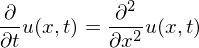

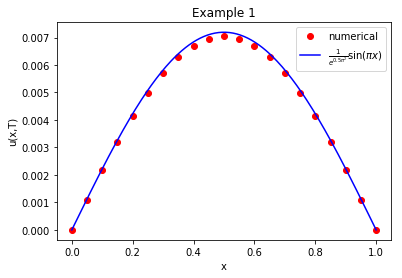

Absolute error = 0.00045988, lambda = 0.4999999999999999


In [3]:
from parabolicpde import ParabolicProblem

# Using forward Euler method, will go unstable for lmbda > 1/2
mx = 20; mt = 400

# Example 1: default problem, see next box
dp1 = ParabolicProblem()

# print the problem specification using LaTeX
dp1.pprint('Example 1: default problem')

# exact solution
u = exp(-(pi**2)*t)*sin(pi*x)

# solve the PDE problem at time T = 0.5 with the forward Euler method
uT, error, lmbda = dp1.solve_at_T(0.5, mx, mt, 'FE', u_exact=u, title='Example 1')
print('Absolute error = {:.8f}, lambda = {}'.format(error, lmbda))

## Example 2: Inhomogeneous Dirichlet Condition ##

Diffusion Example 2


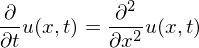

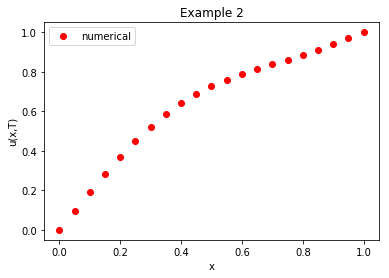

In [4]:
from boundary import Dirichlet

# Example 2 (inhomogeneous Dirichlet condition)
# u(1,t) = 1

# specify the Dirichlet condition with a Dirichlet object, 
# Dirichlet(x, f(t))

dp2 = ParabolicProblem(rbc=Dirichlet(1,1))

dp2.pprint('Diffusion Example 2')

# with backward Euler this time (change to 'FE' or 'CN' for forward Euler or Crank-Nicholson)
uT, _, _ = dp2.solve_at_T(0.05, mx, mt, 'BE', title='Example 2')

## Example 3: Neumann Boundary Conditions ##

Diffusion Problem 3


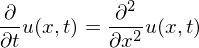

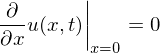

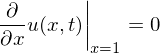

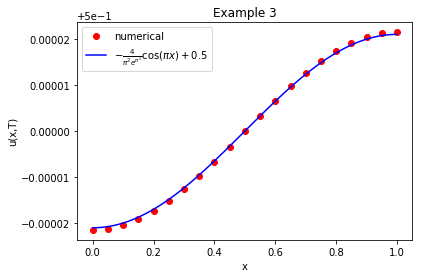

Absolute error = 0.00000153, lambda = 0.9999999999999998


In [5]:
from boundary import Neumann

dp5 = ParabolicProblem(lbc=Neumann(0,0), rbc=Neumann(1,0), ic=x)
dp5.pprint('Diffusion Problem 3')

# exact solution can only be obtained in terms of a Fourier series, so we'll compare with the first term only
u_first = 0.5 - (4/pi**2)*exp(-pi**2*t)*cos(pi*x)

# Crank-Nicholson this time, at time t = 1 to allow higher order terms in the series to die out
uT, error, lmbda = dp5.solve_at_T(1, mx, mt, 'CN', u_exact=u_first, title='Example 3')
print('Absolute error = {:.8f}, lambda = {}'.format(error, lmbda))

## Example 4: Constant Source Function ##

Diffusion Problem 4


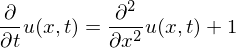

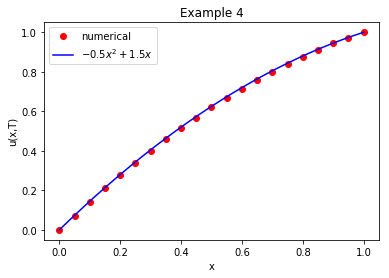

Absolute error = 0.01702815, lambda = 0.4999999999999999


In [6]:
dp4 = ParabolicProblem(source=1, rbc=Dirichlet(1,1), ic=0)
dp4.pprint('Diffusion Problem 4')

# Compare with the steady state solution
ss = -0.5*x**2 + 1.5*x
uT, error, lmbda = dp4.solve_at_T(0.5, mx, mt, 'FE', u_exact=ss, title='Example 4')
print('Absolute error = {:.8f}, lambda = {}'.format(error, lmbda))

## Example 5: Spatially Varying Source Function

Diffusion Problem 7


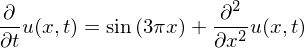

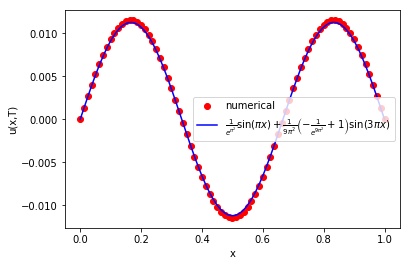

Absolute error = 0.00166355, lambda = 3.1999999999999993


In [7]:
mx=80; mt=2000

dp7 = ParabolicProblem(source=sin(3*pi*x), ic=sin(pi*x))
dp7.pprint('Diffusion Problem 7')

u = exp(-(pi**2)*t)*sin(pi*x) + \
        (1/(3*pi)**2)*(1 - exp(-9*pi**2*t))*sin(3*pi*x)

uT, error, lmbda = dp7.solve_at_T(1, mx, mt, 'CN', u_exact = u)
print('Absolute error = {:.8f}, lambda = {}'.format(error, lmbda))

## Example 6: Mixed Boundary Conditions ##


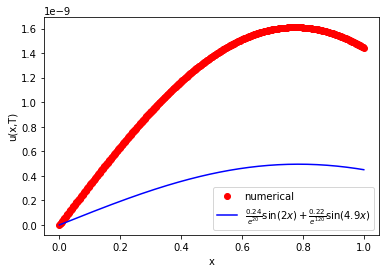

Absolute error = 0.00000002, lambda = 4166.666666666667


In [8]:
from boundary import Mixed

mt = 300
mx = 500

# specify a mixed boundary condition such as 
# alpha*u + beta*du/dx = g(x)
# at x = a by
# Mixed(a, (alpha, beta, g))

dpmixed = ParabolicProblem(lbc=Mixed(0, (1,0,0)),
                           rbc=Mixed(1, (1,1,0)),
                           ic=x)
    
# first two terms of Fourier Series Solution
u = 0.24*exp(-4*t)*sin(2*x) + 0.22*exp(-24*t)*sin(4.9*x)
uT, error, lmbda = dpmixed.solve_at_T(5, mx, mt, 'BE2', u_exact=u)
print('Absolute error = {:.8f}, lambda = {}'.format(error, lmbda))

# Hyperbolic Problems #
## Example 7: Homogeneous Dirichlet Conditions ##

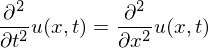

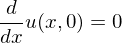

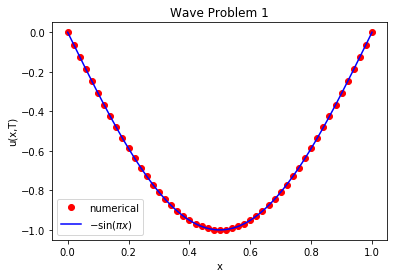

Absolute error = 0.00000063, lambda = 0.16666666666666669


In [9]:
from hyperbolicpde import HyperbolicProblem
mx = 50
mt = 300

# default problem
wp9 = HyperbolicProblem()
wp9.pprint()
    
u= cos(pi*t)*sin(pi*x)

uT, error, lmbda = wp9.solve_at_T(1, mx, mt, 'E',
                           u_exact=u, title='Wave Problem 1')
print('Absolute error = {:.8f}, lambda = {}'.format(error, lmbda))

## Example 8: Neumann conditions ##

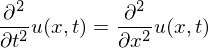

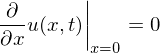

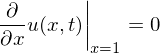

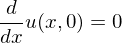

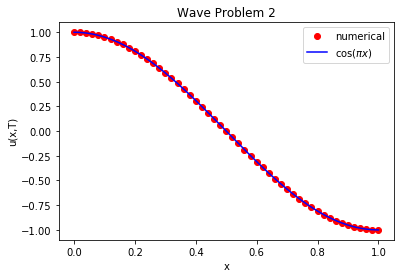

Absolute error = 0.00000659, lambda = 0.33333333333333337


In [10]:
mx = 50
mt = 300
A = 1

wp11 = HyperbolicProblem(ix=A*cos(pi*x), iv=0,
                         lbc=Neumann(0,0), rbc=Neumann(1,0))
wp11.pprint()

u = A*cos(pi*t)*cos(pi*x)

uT, error, lmbda = wp11.solve_at_T(2, mx, mt, 'I',
                                   u_exact=u, title='Wave Problem 2')
print('Absolute error = {:.8f}, lambda = {}'.format(error, lmbda))

## Example 9: Time-varying Dirichlet conditions ##

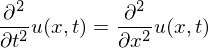

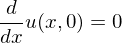

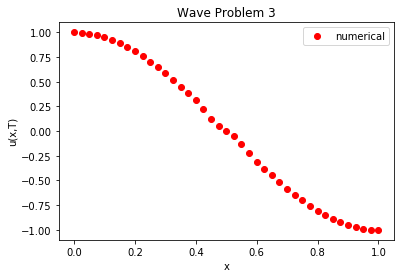

In [11]:
mx = 40
mt = 500

# time-varying Dirichlet boundary conditions
wp14 = HyperbolicProblem(ix=sin(pi*x), iv=0,
                         lbc=Dirichlet(0, sin(pi*t)),
                         rbc=Dirichlet(1,-sin(pi*t)))
wp14.pprint()

uT, error, lmbda = wp14.solve_at_T(0.5, mx, mt, 'E',
                                   title='Wave Problem 3')

# Elliptic Problems #
## Example 10: Inhomogeneous Dirichlet Condition ##

Elliptic Example


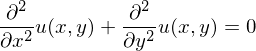

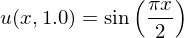

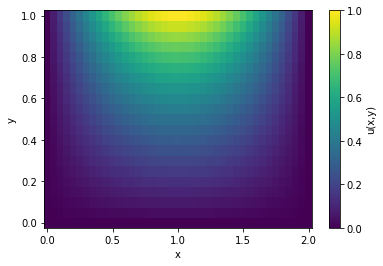

Final iteration error = 9.94658856148245e-05
Max error = 0.0019420162026717591
no. of iterations = 123


In [12]:
from ellipticpde import EllipticProblem

# elliptic example
mx = 40              # number of gridpoints in x
my = 20              # number of gridpoints in y
maxerr = 1e-4        # target error
maxcount = 1000      # maximum number of iteration steps
omega = 1.5
ep1 = EllipticProblem()
ep1.pprint(title='Elliptic Example')

u = sin(pi*x/2)*sinh(pi*y/2)/sinh(pi/2)
u_new, count, error, err_true = ep1.solve(mx, my, maxcount, maxerr, omega, u)
print('Final iteration error = {}\nMax error = {}\nno. of iterations = {}'.format(error, err_true, count))